In [1]:
library(limma)
library(statmod)
library(arrow)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [32]:
methylation_data <- read_feather("/home/vpal/hobotnica/Feature_selection/datasets/feather_ds_no_age_39_ds_only_interception/GSE32148.feather")

In [46]:
metadata <- methylation_data[, c("index", "Condition", "Age")]
cpg_sites <- methylation_data[, !colnames(methylation_data) %in% c("index", "Condition", "Age")]
cpg_sites <- t(cpg_sites)

metadata$Condition <- factor(metadata$Condition, levels = c("HC", "IBD"))

colnames(cpg_sites) <- metadata$index

In [ ]:
design <- model.matrix(~ Condition, data = metadata)

fit <- lmFit(cpg_sites, design)
fit <- eBayes(fit)

In [59]:
top_dmp <- topTable(fit, coef = "ConditionIBD", number = Inf, adjust = "BH")
head(top_dmp)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg03681057,-0.08405159,-0.04933463,-5.493236,1.695771e-06,0.3691694,3.814514
cg07288027,0.01973600,0.01158418,4.879981,1.338139e-05,0.4784490,1.775708
cg00574379,0.08425533,0.04945421,4.854940,1.454264e-05,0.4784490,1.693898
cg18687314,-0.03306551,-0.01940802,-4.802430,1.730919e-05,0.4784490,1.522787
cg10540721,0.02779380,0.01631375,4.781306,1.856278e-05,0.4784490,1.454124
cg00008671,0.08655073,0.05080152,4.773691,1.903629e-05,0.4784490,1.429393


In [56]:
write.csv(top_dmp, "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_all_sites/GSE32148.csv", row.names = TRUE)

In [62]:
significant_sites <- top_dmp[abs(top_dmp$logFC) > 0.2, ]

In [79]:
significant_sites <- top_dmp[top_dmp$P.Value < 0.05 & abs(top_dmp$logFC) > 0.1, ]
head(significant_sites)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,significant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
cg02879423,0.1148806,0.06742989,4.571050,3.705916e-05,0.6067185,0.7763831,Significant
cg15551881,0.1097698,0.06443009,4.461420,5.295200e-05,0.6067185,0.4274446,Significant
cg00293644,-0.1000342,-0.05871570,-4.146564,1.452453e-04,0.7913371,-0.5553406,Significant
cg19190593,-0.1074109,-0.06304553,-3.753856,4.917220e-04,0.8345042,-1.7339630,Significant
cg11348106,-0.1029377,-0.06041996,-3.661819,6.496693e-04,0.8495687,-2.0014744,Significant
cg05613718,0.1679833,0.09859887,3.493403,1.073001e-03,0.9369171,-2.4814518,Significant


In [78]:
write.csv(top_dmp, "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_only_significant_sites_LogFC>0.1/GSE32148.csv", row.names = TRUE)

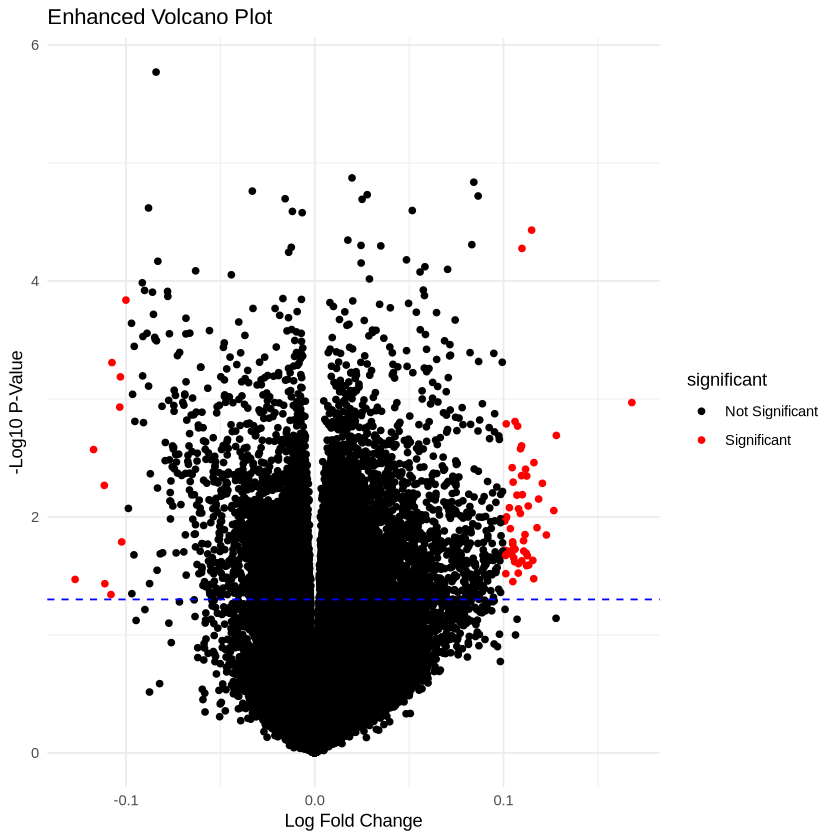

In [77]:
library(ggplot2)

# Add a significance column
top_dmp$significant <- ifelse(top_dmp$P.Value < 0.05 & abs(top_dmp$logFC) > 0.1, "Significant", "Not Significant")

# Volcano plot with highlights
ggplot(top_dmp, aes(x = logFC, y = -log10(P.Value), color = significant)) +
  geom_point() +
  scale_color_manual(values = c("Significant" = "red", "Not Significant" = "black")) +
  geom_hline(yintercept = -log10(0.05), col = "blue", linetype = "dashed") +
  theme_minimal() +
  labs(title = "Enhanced Volcano Plot", x = "Log Fold Change", y = "-Log10 P-Value")

In [95]:

# input_folder <- "/home/vpal/hobotnica/Feature_selection/datasets/feather_ds_no_age_39_ds_only_interception"    
# output_folder <- "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_all_sites" 
# sig_features <- "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_only_significant_sites_LogFC>0.1"
# if (!dir.exists(output_folder)) dir.create(output_folder)

# files <- list.files(input_folder, full.names = TRUE) 

# for (file in files) {
  
#   cat("Processing file:", file, "\n")

#   dataset <- read_feather(file) 
  
#   metadata <- dataset[, c("Condition", "Age", "index")] 
#   cpg_sites <- dataset[, !colnames(dataset) %in% c("Condition", "index", "Age")]
#   cpg_sites <- t(cpg_sites)
#   metadata$Condition <- factor(metadata$Condition)

#   colnames(cpg_sites) <- metadata$index
#   design <- model.matrix(~ Condition, data = metadata)

#   fit <- lmFit(cpg_sites, design)
#   fit <- eBayes(fit)

#   top_dmp <- topTable(fit, coef = 2, number = Inf, adjust = "BH") 
  
#   output_file_all <- file.path(output_folder, paste0(basename(file)))
#   write.csv(top_dmp, output_file_all, row.names = TRUE)
  
#   # Filter significant sites (P.Val < 0.05 and abs(logFC) > 0.1)
#   significant_sites <- top_dmp[top_dmp$P.Val < 0.05 & abs(top_dmp$logFC) > 0.1, ]
#   output_file_significant <- file.path(sig_features, paste0(basename(file)))
#   write.csv(significant_sites, output_file_significant, row.names = TRUE)
# }

In [ ]:
##parametrs adjustement. S0, the parametrs for filtartion are pval 0.01 and lfg |0.035|

# library(dplyr)

# folder_path <- "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_all_sites"  
# file_list <- list.files(folder_path, full.names = TRUE)

# threshold_results <- data.frame()

# calculate_significant_sites <- function(data, pval_threshold, logfc_threshold) {
#   data %>%
#     filter(P.Value < pval_threshold & abs(logFC) > logfc_threshold) %>%
#     nrow()
# }

# pval_values <- seq(0.01, 0.1, by = 0.01) 
# logfc_values <- seq(0.035, 0.1, by = 0.01)  

# for (file in file_list) {
#   data <- read.csv(file, stringsAsFactors = FALSE)
#   dataset_name <- tools::file_path_sans_ext(basename(file))
  
#   if (all(c("P.Value", "logFC") %in% colnames(data))) {
#     for (pval_threshold in pval_values) {
#       for (logfc_threshold in logfc_values) {
#         n_significant <- calculate_significant_sites(data, pval_threshold, logfc_threshold)
#         if (n_significant >= 10) {
#           threshold_results <- rbind(
#             threshold_results,
#             data.frame(Dataset = dataset_name, Pval = pval_threshold, LogFC = logfc_threshold, Sites = n_significant)
#           )
#           break
#         }
#       }
#       if (dataset_name %in% threshold_results$Dataset) break
#     }
#   } 
# }

# print(threshold_results)
# write.csv(threshold_results, "/home/vpal/hobotnica/Feature_selection/diff_methylation/optimal_thresholds.csv", row.names = FALSE)

In [ ]:
##signature filtration after parametrs adjustments
# library(dplyr)

# folder_path <- "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_all_sites"
# output_folder <- "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01"

# file_list <- list.files(folder_path, full.names = TRUE)

# pval_threshold <- 0.01
# logfc_threshold <- 0.035

# for (file in file_list) {
#   data <- read.csv(file, stringsAsFactors = FALSE)
#   dataset_name <- tools::file_path_sans_ext(basename(file))

#   if (all(c("P.Value", "logFC") %in% colnames(data))) {
#     filtered_data <- data %>%
#       filter(P.Value < pval_threshold & abs(logFC) > logfc_threshold)

#     output_file <- file.path(output_folder, paste0(dataset_name))
#     write.csv(filtered_data, output_file, row.names = FALSE)
    
#     message(paste("Filtered data for", dataset_name, "saved to", output_file))
#   }
# }

Filtered data for GSE106648 saved to /home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01/GSE106648

Filtered data for GSE107143 saved to /home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01/GSE107143

Filtered data for GSE111223 saved to /home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01/GSE111223

Filtered data for GSE111629 saved to /home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01/GSE111629

Filtered data for GSE118468 saved to /home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01/GSE118468

Filtered data for GSE118469 saved to /home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01/GSE118469

Filtered data for GSE122244 saved to /home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01/GSE122244

Filtered data for GSE130029

In [1]:
library(amap)
#Kendall distances fucntion

kendall_dist <- function(ds_samples) {
    ds_samples <- as.data.frame(ds_samples)
    if ("Condition" %in% colnames(ds_samples) || "Age" %in% colnames(ds_samples)) {
        matrix <- dplyr::select(ds_samples, -Condition, -Age)
    } else {
        matrix <- ds_samples
    }
    distMatrix <- Dist(matrix, method = "kendall", nbproc = 2) 
    return(distMatrix)
}

distrib_and_hobot <- function(distMatrix, annotation, number) {
    h_val <- Hobotnica(distMatrix, annotation)
    distMatrix_2 = as.matrix(distMatrix)
    distribution <- RandomeDistribution(distMatrix_2, annotation, number)
    pval <- (1+ sum(distribution >= h_val))/number
    result <- list(pval = pval, h_val = h_val, random_h_scores = distribution)
    return(result)
}

library(doParallel)
library(dplyr)

RandomeDistribution <- function(distMatrix, annotation, nPermutations) {
    if (length(dim(distMatrix)) != 2) {
        stop("The distMatrix dim length should be equal 2, stopping.")
    }
    if (dim(distMatrix)[1] != dim(distMatrix)[2]) {
        stop("distMatrix should be a square matrix, stopping")
    }
    
    H_scores <- foreach (i = 1:nPermutations, .packages = c("dplyr"),
                      .export = c("Hobotnica"),
                      .combine = 'c') %dopar% {
        permutedAnnotation <- sample(annotation, length(annotation), replace=FALSE)
        H_result <- Hobotnica(distMatrix, permutedAnnotation)
        
        return(H_result)
    }

}

Hobotnica <- function(distMatrix, annotation){
    if (typeof(annotation) == "list") {
        annotation <- as.vector(unlist(annotation))
    } else {
        annotation <- as.vector(annotation)
    }
    rank.m <- as.matrix(distMatrix) # transform distance matrix to matrix object
    rank.m[lower.tri(rank.m)] <- rank(rank.m[lower.tri(rank.m)]) # transform distances to ranks
    rank.m[upper.tri(rank.m)] <- rank(rank.m[upper.tri(rank.m)]) #

    inclass_sum <- 0
    classes <- unique(annotation) # unique classes
    Ns <- vector()

    for (i  in 1:length(classes)){

        clas <- classes[i]
        class_samples <- which(annotation == clas)
        l_tmp <- length(class_samples)
        Ns[i] <- l_tmp
        tmp_sum_inclass <- sum(rank.m[class_samples,class_samples]) # sum of ranks, describing in-class distances
        inclass_sum <- inclass_sum + tmp_sum_inclass


    }
    Ns_sum <- sum(Ns)
    biggest_bossible_rank <-  Ns_sum * (Ns_sum - 1)/2
    number_of_unique_inclass_elements <-  sum(Ns * (Ns-1))/2
    maximal_value <- number_of_unique_inclass_elements * (2*biggest_bossible_rank - number_of_unique_inclass_elements + 1)
    minimal_value <- number_of_unique_inclass_elements* (1 + number_of_unique_inclass_elements)

    normalization_factor <- maximal_value - minimal_value
    return (max(0, 1 - (inclass_sum - minimal_value)/normalization_factor ))

}



Loading required package: foreach

Loading required package: iterators

Loading required package: parallel


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
##graph for randome distribution visualization 
library(ggplot2)

plot_distrib <- function(distrib_result) {

  real_h_score <- as.numeric(distrib_result$h_val)
  pval <- as.numeric(distrib_result$pval)
  random_h_scores <- distrib_result$random_h_scores

  hist_data <- hist(random_h_scores, breaks = seq(0, 1, by = 0.001), plot = FALSE)

  normalized_counts <- hist_data$counts / sum(hist_data$counts)

  data <- data.frame(h_scores = hist_data$mids, normalized_counts = normalized_counts)

  plot <- ggplot(data = data, aes(x = h_scores, y = normalized_counts)) +
    geom_bar(stat = "identity", fill = "skyblue", color = "black", alpha = 0.9) +
    
    geom_vline(aes(xintercept = real_h_score), color = "red", linetype = "dashed", size = 0.7) +
    
    labs(title = "Normalized Distribution of Random h_scores with Real h_score Highlighted",
         x = "Distribution of Random H-scores",
         y = "Normalized Frequency") +

    annotate("text", x = real_h_score - 0.001, 
             y = max(normalized_counts), 
             label = paste("H-score =", real_h_score, "\np-value =", pval), 
             color = "red", vjust = + 1.0) +
    
    # Set fixed x and y limits
    xlim(c(0, 1))  +
    ylim(c(0, max(normalized_counts)))
           
  return(plot)
}

#PCA function for plotting

library(ggplot2)
library(dplyr)
library(ggfortify)

PCA_my_plot <- function(data, filename, phrase){

  # Select columns for PCA, excluding 'Condition' and 'Age'
  pca_data <- data %>% select(-Condition, -Age, -Gender)

  # Convert all columns to numeric
  pca_data <- pca_data %>% mutate_all(as.numeric)

  # # Replace infinite values with NA
  # pca_data[!is.finite(as.matrix(pca_data))] <- NA

  # total_columns <- ncol(pca_data)
  # pca_data_clean <- pca_data %>% select_if(~ all(!is.na(.)))

  # Perform PCA
  pca_result <- prcomp(pca_data, center = TRUE, scale. = TRUE)

  # Plot the PCA result with percentage of removed columns as subtitle
   p <- autoplot(pca_result, data = data, colour = 'Condition') +
    labs(title = filename, subtitle = paste0(phrase)) +
    theme(plot.title = element_text(hjust = 0.5),
          plot.subtitle = element_text(hjust = 0.5))

  return(p)
}


In [3]:
# library(dplyr)
# library(ggplot2)

# # Read the CSV file
# result <- read.csv("/tank/projects/vpalagina_hobotnica/hobotnica/clocks/a_new_set_for_checks/final_res.csv", sep = ",", header = TRUE)

# # Extract columns for plotting
# x <- result$H_score
# y <- result$H_score_no_Age
# pvalue <- result$p_value
# pvalue_no_age <- result$p_value_no_Age

# # Create a data frame with relevant information
# data <- data.frame(x = x, y = y, pvalue = pvalue, pvalue_no_age = pvalue_no_age)

# # Add a column for significant p-values
# data$significance <- ifelse(data$pvalue_no_age < 0.05, "Significant (No age)", "Not significant (No age)")
# data$position <- ifelse(data$y > data$x, "No age > With age", "No age < With age")
# data$position <- factor(data$position, levels = c("No age > With age", "No age < With age"))

# # Calculate how many points have pvalue_no_age significant
# calcul <- sum(data$y > data$x)
# significant_count <- sum(data$pvalue_no_age < 0.05)
# significant_with_age_count <- sum(data$pvalue < 0.05)
# # Plot
# scatter_plot <- ggplot(data, aes(x = x, y = y)) +
#   geom_point(aes(color = position, shape = significance), size = 3) +  
#   geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black") +  # Line where x = y
#   labs(title = paste("Sum of H-scores without age > with age =", calcul,
#                      "\nSignificant pvalue_no_age (<0.05):", significant_count,
#                      "\nSignificant pvalue (with age <0.05):", significant_with_age_count),
#        x = "H-score of initial data",
#        y = "H-score after removal Age variable") +
#   scale_color_manual(values = c("No age > With age" = "#43ad43", "No age < With age" = "#ff0000fc")) +  # Color points
#   scale_shape_manual(values = c("Significant (No age)" = 16, "Not significant (No age)" = 1)) +  # Shape based on significance
#   theme_minimal() + theme()

# print(scatter_plot)

In [ ]:
# ###randome annotation pval
library(dplyr)
library(ggplot2)
library(ggfortify)
library(gridExtra)
library(grid)
library(arrow)

input_dir <- "/10tb/vpal/datasets/feather_ds_no_age_39_ds_only_interception"
filtered_sites_dir <- "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_LogFC>0.035_and_pval_0.01"
distribution_path <- "/home/vpal/hobotnica/Feature_selection/diff_methylation/distrib_h_score"

file_list1 <- list.files(path = input_dir, full.names = TRUE)
file_list2 <- list.files(path = filtered_sites_dir, full.names = TRUE)

if (length(file_list1) != length(file_list2)) {
  stop("The number of files in each directory does not match.")
}

new_result_table <- data.frame(
  Dataset_ID = character(), 
  H_score = numeric(), 
  p_value = numeric(), 
  stringsAsFactors = FALSE
)

all_plots <- list()

for (i in seq_along(file_list1)) {
  file1 <- file_list1[i]
  file2 <- file_list2[i]

  file_name <- basename(file1)
  dataset_name <- tools::file_path_sans_ext(file_name)

  ds <- read_feather(file1)
  annotation <- ds$Condition

  filtered_sites <- read.csv(file2, stringsAsFactors = FALSE)$X
  additional_columns <- c("index", "Condition", "Age")
  columns_to_process <- intersect(colnames(ds), filtered_sites)

  columns_to_include <- unique(c(additional_columns, columns_to_process))

  submatrix <- ds[, columns_to_include, drop = FALSE]
  submatrix <- as.data.frame(submatrix)
  rownames(submatrix) <- submatrix$index
  submatrix <- submatrix[, !colnames(submatrix) %in% "index"]
  distMatrix <- kendall_dist(submatrix)
  distrib_result <- distrib_and_hobot(distMatrix, annotation, 1000) 
  h_score <- distrib_result$h_val
  p_value <- distrib_result$pval

  distribution <- distrib_result$random_h_scores
  distrib_file <- file.path(distribution_path, paste0(dataset_name, "_distrib.txt"))
  write.table(distribution, file = distrib_file, row.names = FALSE, col.names = FALSE)

  new_result_table <- new_result_table %>%
    add_row(Dataset_ID = dataset_name, H_score = h_score, p_value = p_value)

  plot1 <- plot_distrib(distrib_result)
  combined_plot <- arrangeGrob(plot1, ncol = 1)
  all_plots[[i]] <- combined_plot
}

pdf("/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_meth_diff_signature.pdf", width = 16, height = 16) 
for (plot in all_plots) {
  grid.newpage()
  grid.draw(plot)
}
dev.off()

write.csv(new_result_table, "/home/vpal/hobotnica/Feature_selection/diff_methylation/diff_met_h_scores.csv", row.names = FALSE)


Warning message:
“executing %dopar% sequentially: no parallel backend registered”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
